# Sentiment Indicator Research

**Author:** Tim Smith

**About:** This short research project uncovers the short-term sentiment expressed toward companies on Twitter. The project also demonstrates the unique, helpful skills that I can bring to SEED at Virginia Tech!

## Overview

Below is a brief outline of the project. The code for each section is provided beneath this overview.

### Background

Social sentiment indicators are a helpful tool that can give analysts a broader perspective on how a company's stock might perform. This can be useful for short-term investing, guaging broader attitudes toward companies and company momentum, or even aiding in brainstorming new investment ideas. Additionally, sentiment indicators from popular places such as Twitter and Reddit can be a part of a larger strategy for the newer value momentum investing sector that SEED at Virginia Tech is working on.

### Method

I followed the following steps to perform this research project:
1. Connect to Twitter through its powerful API, Tweepy
2. Retrieve relevant tweets pertaining to the companies over the past week
3. Clean and store tweets in a pandas DataFrame
4. Perform Sentiment Analysis on tweet text
5. Visualize data and Draw Conclusions

### Analysis and Conclusions

While the scope of this project is currently narrow and fairly limited, one can see the overall trend of higher sentiment expresed toward Target on Twitter compared to its competitors, Walmart and Costco, during each day of the week. An expansion of this project could yield more nuanced insights into how consumers view these companies over time and compared to each other. This information could be used in a variety ways including to detect changes in company momentum and to generate new investing ideas. 

Example output from the week of March 19th - March 26th:

![Sentiment expressed toward Target is higher than that toward Walmart and Costco](./examplePhotos/ExampleOutput_March_26_2021.PNG "Twitter Sentiment Toward US Retailers")

### Reflections and Limitations

Similar social sentiment research projects include searching for sentiment on Reddit (PRAW is a helpful API wrapper for this) and web crawling over popular investment websites (BeautifulSoup is a helpful library for this).

Some limitations of this project include:
1. The limits of the sentiment analysis method used (VADER sentiment)
    * The VADER sentiment library is a very powerful sentiment analysis tool developed for detecting sentiment of social media posts, however
    * VADER is geared toward a simplified positive, negative, neutral sentiment score, and
    * The mean compound sentiment scores of each days' tweets is a very simplified measure that does not address greater nuances in Tweets over the time period
1. The short time period of collected Tweets
    * The Tweepy API limits accesses to tweets older than one week. To address this issue, once could either continuously collect tweets or look for another method to access historical Twitter data for analysis.
    * The Tweepy API does not provide a way to collect tweets randomly, thus I made an effort to collect as large a data set as I could given the short time frame for the purposes of demonstrating a proof-of-concept/skills.



# Step 1: Connect to Twitter with Tweepy API

In [1]:
#import packages
import tweepy
import requests
import pandas as pd
import json
import time
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime

In [2]:
# Variables that contains the credentials to access Twitter API
ACCESS_TOKEN = ''
ACCESS_SECRET = ''
CONSUMER_KEY = ''
CONSUMER_SECRET = ''

In [3]:
# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api


# Create API object
api = connect_to_twitter_OAuth()

# Step 2: Retrieve Relevant Tweets About Companies

NOTE: Because of the limits of the Tweepy API discussed in the project overview above, I cannot confirm that the Tweets that I collect are a random sample. Ways to solve this issue are in the overview above.

In [4]:
tweets = []

# This function searches for Tweets from the since_date to the until_date using the query_string in its search.
# It finds and stores a maximum of max_per_day tweets in the tweets array, then prints out a short report.
def load_tweets_between_dates(since_date, until_date, query_string, tweets, max_per_day):
    c = tweepy.Cursor(api.search,
                           q=query_string,
                           include_entities=True, 
                           lange='en',
                           tweet_mode='extended',
                           since=since_date,
                           until=until_date).items(max_per_day)
    initial_length = len(tweets)
    while True:
        try:
            tweet = c.next()
            tweets.append(tweet)
        except tweepy.TweepError:
            if (len(tweets) > 100000):
                break
            print("\tHit rate limit! Going to sleep zzzzzzzzzz.....")
            for i in range(0, 3):
                print("\t%d minutes left" % ((3-i)*5))
                time.sleep(60 * 5)
            time.sleep(10)
            continue
        except StopIteration:
            print("Collected %d tweets between %s and %s.\n" % (len(tweets) - initial_length, since_date, until_date))
            return
        except Exception as e:
            print(e)
            
    print("Collected %d tweets between %s and %s.\n" % (len(tweets) - initial_length, since_date, until_date))

In [5]:
# This method collects tweets using the query_string in its search and stores found tweets in the tweets array.
# It finds tweets for each day in the past week, and prints out a report of its findings.
def collect_weeks_tweets_about(query_string, tweets):
    days_back = 8
    max_tweets = 1500
    print("BEGINNING...\n")
    for i in range(0, days_back):
        since_day = (datetime.datetime.today() - datetime.timedelta(days=i)).strftime('%Y-%m-%d')
        until_day = (datetime.datetime.today() - datetime.timedelta(days=i - 1)).strftime('%Y-%m-%d') # up to tomorrow
        load_tweets_between_dates(since_day, until_day, query_string, tweets, max_tweets)
    
    print("FINISHED!")        
    print("%d tweets collected!\n" % len(tweets))

In [6]:
# collect tweets about Target, Walmart, and Costco
costco_query = "Costco" # LIMITATION: its ticker, COST, is too generic
costco_tweets = []
collect_weeks_tweets_about(costco_query, costco_tweets)

target_query = "Target Inc OR Target Inc. OR Target incorporated OR Target Corp OR Target corp OR Target corp. OR Target corporation OR TGT"
target_tweets = [] # LIMITATION: its name, Target, is too generic by itself
collect_weeks_tweets_about(target_query, target_tweets)

# "Walmart OR WMT"
walmart_query = "Walmart OR WMT"
walmart_tweets = []
collect_weeks_tweets_about(walmart_query, walmart_tweets)

BEGINNING...

Collected 1500 tweets between 2021-03-26 and 2021-03-27.

	Hit rate limit! Going to sleep zzzzzzzzzz.....
	15 minutes left
	10 minutes left
	5 minutes left
Collected 1500 tweets between 2021-03-25 and 2021-03-26.

Collected 1500 tweets between 2021-03-24 and 2021-03-25.

	Hit rate limit! Going to sleep zzzzzzzzzz.....
	15 minutes left
	10 minutes left
	5 minutes left
Collected 1500 tweets between 2021-03-23 and 2021-03-24.

Collected 1500 tweets between 2021-03-22 and 2021-03-23.

	Hit rate limit! Going to sleep zzzzzzzzzz.....
	15 minutes left
	10 minutes left
	5 minutes left
Collected 1500 tweets between 2021-03-21 and 2021-03-22.

Collected 1500 tweets between 2021-03-20 and 2021-03-21.

	Hit rate limit! Going to sleep zzzzzzzzzz.....
	15 minutes left
	10 minutes left
	5 minutes left
Collected 1500 tweets between 2021-03-19 and 2021-03-20.

FINISHED!
12000 tweets collected!

BEGINNING...

Collected 79 tweets between 2021-03-26 and 2021-03-27.

Collected 163 tweets betw

# Step 3: Clean Data

In [14]:
# This function takes an array of tweets and converts them to a pandas dataframe
def tweets_to_dataframe(tweets):

    # Load tweets' _json attribute into a json object 
    json_tweets = []
    for i in range(0, len(tweets)):
        new_tweet = json.loads(json.dumps(tweets[i]._json))
        json_tweets.append(new_tweet)
    
    # create a pandas DataFrame from the json object so data is easier to work with
    pd.set_option("display.max_colwidth", None) # Set display so text is not truncated
    df = pd.json_normalize(json_tweets)

    return df
    

In [15]:
# This function produces a slimmer dataframe containing more relevant, cleaned fields 
def get_cleaned_dataframe(df):
    # Create a new pandas DataFrame that holds most relevant information
    tweetsDF = pd.DataFrame()
    tweetsDF['User_Name'] = df['user.name']
    tweetsDF['User_Screen_Name'] = df['user.screen_name']

    tweetsDF['Text'] = df['full_text']
    tweetsDF['ID'] = df['id']
    tweetsDF['Retweet_Count'] = df['retweet_count']
    tweetsDF['Favorite_Count'] = df['favorite_count']

    tweetsDF['User_ID'] = df['user.id']
    tweetsDF['Language'] = df['lang']
    tweetsDF['Date'] = df.created_at.map(lambda date: int(date.split()[2]))
    first = str(tweetsDF['Text'].iloc[0:1])

    # remove repeat posts with same text by the same author
    original_rows = tweetsDF.shape[0]
    tweetsDF.drop_duplicates(subset=['User_ID', 'Text'])
    kept_rows = tweetsDF.shape[0]
    rows_removed = original_rows - kept_rows
    print("%d duplicate data entries were removed from the data set." % rows_removed)
    
    return tweetsDF

In [16]:
# Getting dataframes from collected tweets
targetDF = get_cleaned_dataframe(tweets_to_dataframe(target_tweets))
walmartDF = get_cleaned_dataframe(tweets_to_dataframe(walmart_tweets))
costcoDF = get_cleaned_dataframe(tweets_to_dataframe(costco_tweets))

0 duplicate data entries were removed from the data set.
0 duplicate data entries were removed from the data set.
0 duplicate data entries were removed from the data set.


# Step 4: Perform Sentiment Analysis

In [ ]:
# conduct sentiment analysis with VADER sentiment tool - designed for determining overall sentiment on social media
# Vader is especially designed for social media analysis as it looks at things like >:( and ??? or WTF
def get_sentiment(tweetsDF):
    analyzer= SentimentIntensityAnalyzer()
    
    tweetsDF['Sentiment'] = tweetsDF.Text.map(lambda t: analyzer.polarity_scores(t)["compound"])
    
# getting the sentiment
get_sentiment(walmartDF)
get_sentiment(targetDF)
get_sentiment(costcoDF)

# Step 5 Visualize and Draw Conclusions

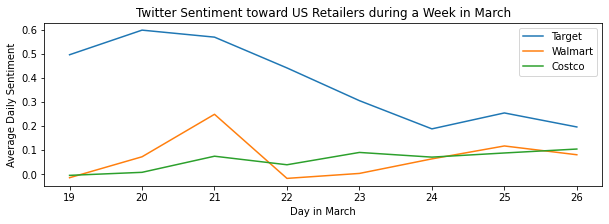

In [23]:
# Plot mean sentiments for each company per day
groupedDF = targetDF.groupby('Date').mean()
plot = groupedDF.plot.line(y='Sentiment', figsize=(10,3), label='Target')
plot.set_ylabel('Average Daily Sentiment')
plot.set_xlabel('Day in March')
plot.set_title('Twitter Sentiment toward Target during a Week in March')
    
# This method adds a line to the plot
def plot_sentiment(tweetsDF, plot, label):
    groupedDF = tweetsDF.groupby('Date').mean()
    # print(groupedDF.iloc[:,-1:])
    plot = groupedDF.plot.line(y='Sentiment', figsize=(10,3), ax=plot, label=label)
    plot.set_ylabel('Average Daily Sentiment')
    plot.set_xlabel('Day in March')
    plot.set_title('Twitter Sentiment toward US Retailers during a Week in March')
    return plot
    
plot = plot_sentiment(walmartDF, plot, 'Walmart')
plot = plot_sentiment(costcoDF, plot, 'Costco')

### Conclusions:
While the scope of this project is currently narrow and limited, one can see the overall trend of higher sentiment expresed toward Target on Twitter during each day of the week. An expansion of this project could yield more nuanced insights into how consumers view these companies over time and compared to each other. This information could be used in a variety ways including to detect changes in company momentum over time. 

In [22]:
# Store data into a csv for later use
today = datetime.datetime.today().strftime('%Y-%m-%d')
targetDF.to_csv('./TargetData_%s.csv' % today)
walmartDF.to_csv('./WalmartData_%s.csv' % today)
costcoDF.to_csv('./CostcoData_%s.csv' % today)

# Text Cleaning Functions
These functions were not used but are preserved below. They are useful for converting text into cleaned bags of words

In [ ]:
# clean review text and turn into a bag with stop words removed
def clean_review_text(reviewText):
    reviewBag = reviewText.lower().split()
    reviewBag = [word for word in reviewBag if not word.startswith('@')]
    reviewBag = [word for word in reviewBag if 'https' not in word]
    reviewBag = [word for word in reviewBag if not word in all_stopwords]
    reviewBag = [strip_punctuation_and_digits(word) for word in reviewBag]
    return reviewBag

def clean_text(text):
    text = text.lower()
    text = strip_punctuation_and_digits(text)
    return text
    
# clean strings in bag of punctuation and numbers
def strip_punctuation_and_digits(text):
    for thing in string.punctuation:
        text = text.replace(thing, '')
    for thing in string.digits:
        text = text.replace(thing, '')
    text = text.replace('"', '').replace("'", '')
    return text

tweetsDF['Bag'] = tweetsDF.Text.map(lambda t: clean_review_text(t))
tweetsDF.head(10)
tweetsDF.Bag.iloc[8:9]

In [ ]:
for i in range(0, 10):
    print(i)
    for tweet in tweepy.Cursor(api.search, q='#Oracle', count=5, 
        lang='en').items(): # since='2017-06-20'
        tweets.append(tweet)
    time.sleep(1)

print(tweets)
    
for tweet in tweepy.Cursor(api.search, q='#Oracle', count=1, 
    lang='en').items(): # since='2017-06-20'
        tweets.append(tweet)

In [ ]:
# Scratchwork:

# tweets from a specific user
# chickfila_tweets = api.user_timeline('Chickfila')
# for tweet in chickfila_tweets:
#     print(tweet.text)

# fetched_tweets = api.search("MathWorks", count = 6)
# for tweet in fetched_tweets:
#     print(tweet.text)